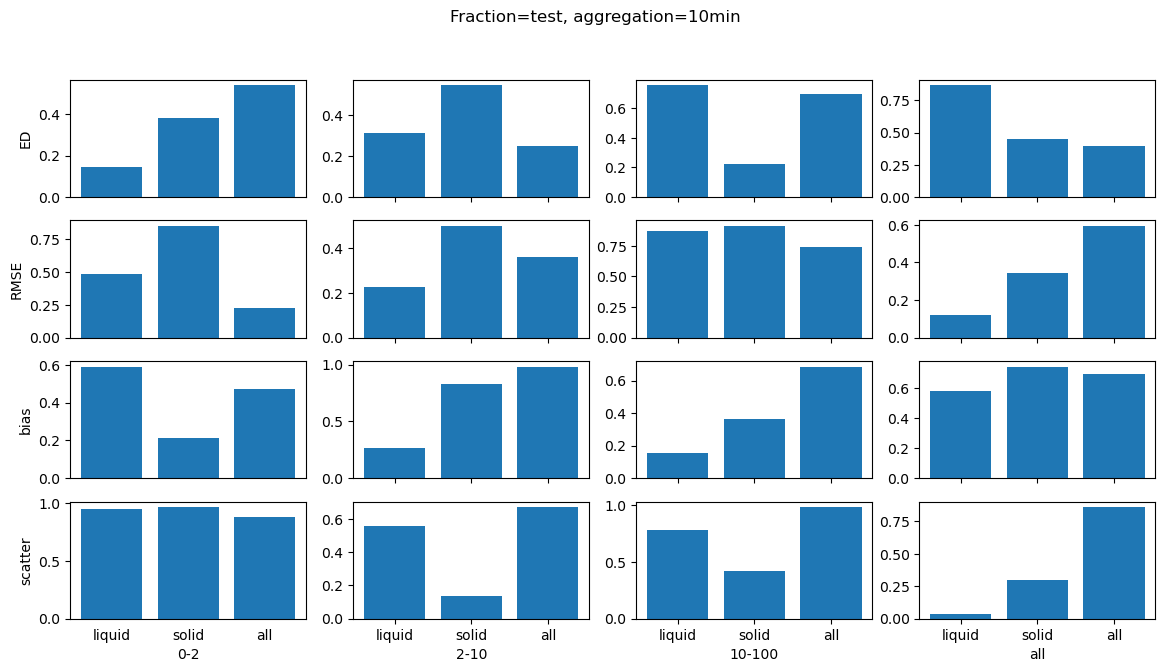

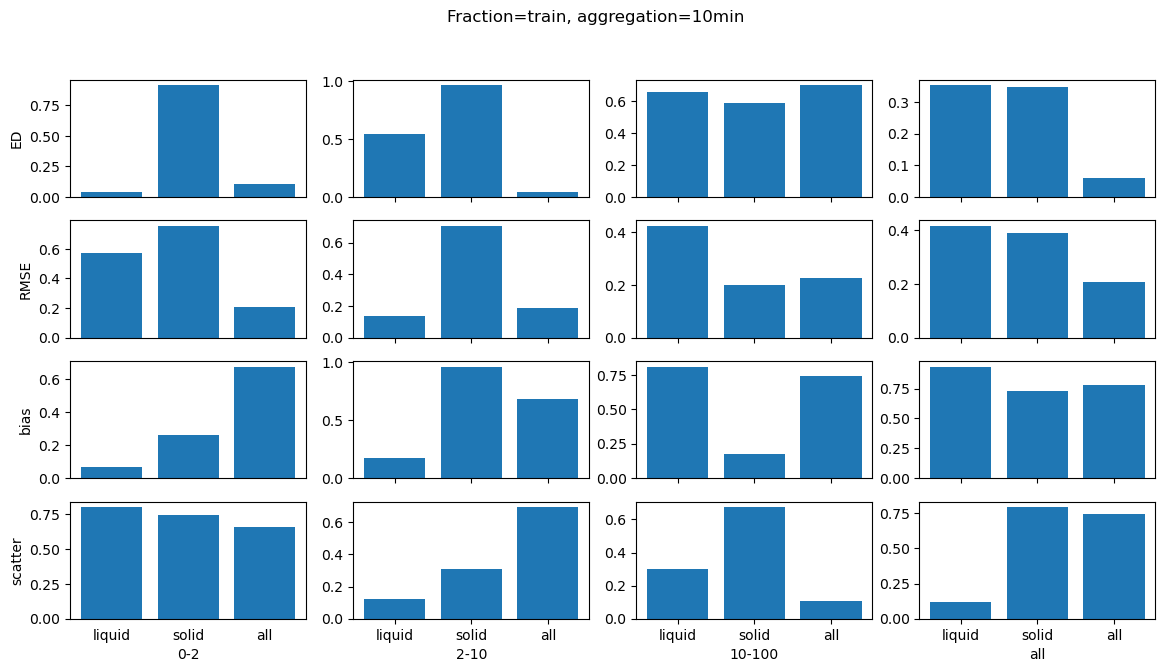

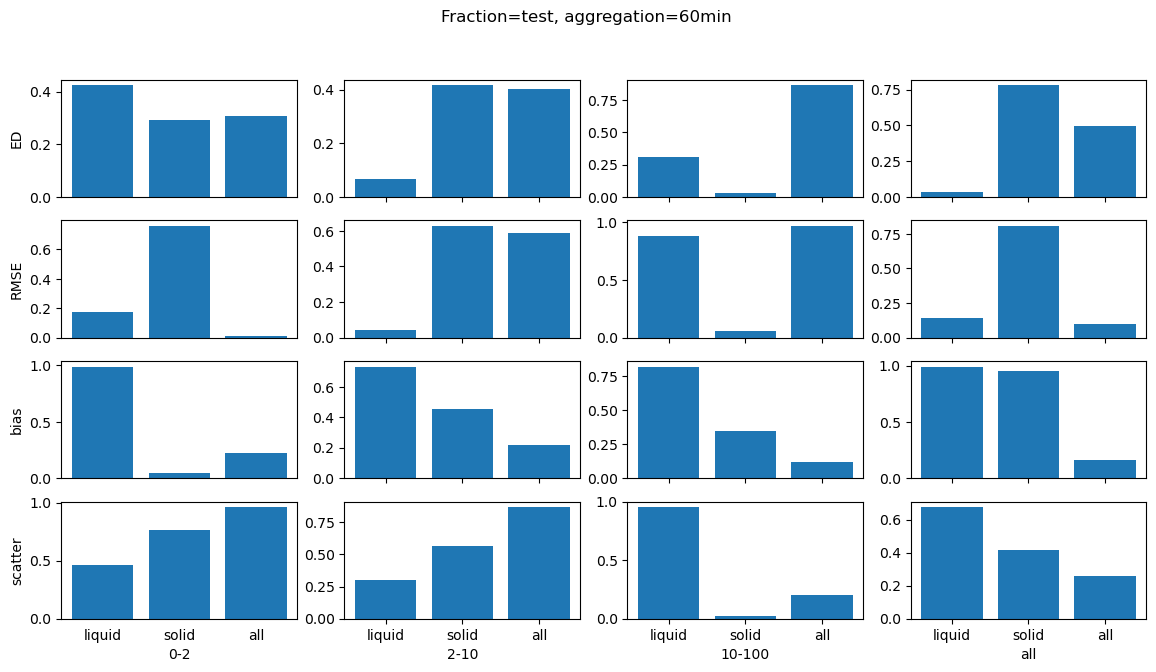

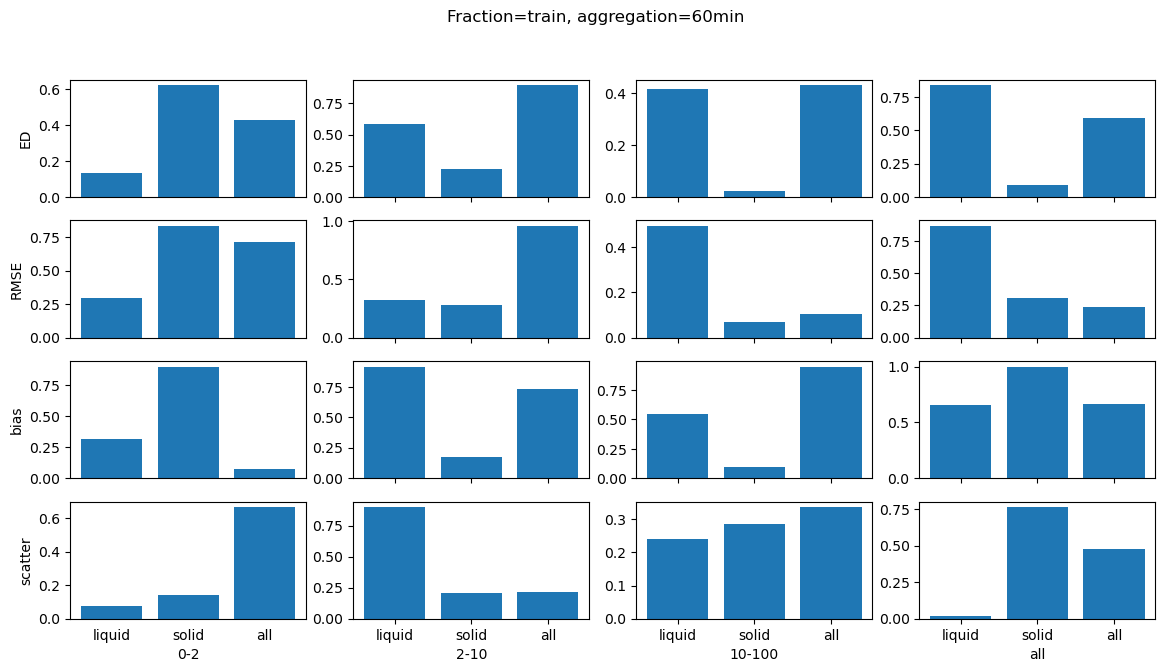

In [23]:
import random
import matplotlib.pyplot as plt
agg = ["10min", "60min"]
fraction = ["test", "train"]
precip_type = ["liquid", "solid", "all"]
intensity_range = ["0-2", "2-10", "10-100",  "all"]
metric_names = ["ED","RMSE","bias","scatter"]
mymetrics = {}
for ag in agg:
    mymetrics[ag] = {}
    for f in fraction:
        mymetrics[ag][f] = {}
        for pt in precip_type:
            mymetrics[ag][f][pt] = {}
            for ir in intensity_range:
                mymetrics[ag][f][pt][ir] = {}
                for metric in metric_names:
                    mymetrics[ag][f][pt][ir][metric] =  random.random()
                    
def plot_fit_metrics(metrics, output_folder):
    """
    Plots the metrics for a given fit as performed in
    the rf.py module 
    
    Parameters
    ----------
    metrics : dict
        dictionary containing the result statistics as obtained in the 
        rf.py:fit_models function
    output_folder : str
        where to store the plots
    
    
    """ 
    metrics = mymetrics
    aggregations = list(metrics.keys())
    fractions = list(metrics[aggregations[0]].keys())
    precip_types = list(metrics[aggregations[0]][fractions[0]].keys())
    intensity_ranges = list(metrics[aggregations[0]][fractions[0]][precip_types[0]].keys())
    metric_names = list(metrics[aggregations[0]][fractions[0]][precip_types[0]][intensity_ranges[0]].keys())

    for ag in aggregations:
        for f in fractions:
            fig, ax = plt.subplots(len(metric_names), len(intensity_ranges), figsize=(14,7))
            for i, metric in enumerate(metric_names):
                for j, ir in enumerate(intensity_range):
                    ax[i,j].bar(precip_type, [mymetrics[ag][f][p][ir][metric] for p in precip_type], color = 'C0')
                    if i != len(metric_names) - 1:
                        ax[i,j].set(xticklabels=[])
                    if j == 0:
                        ax[i,j].set_ylabel(metric)
                ax[i,0].tick_params(bottom=False)  # remove the ticks
                
                for j in range(len(intensity_range)):
                    ax[-1, j].set_xlabel(intensity_range[j])
            fig.suptitle(f"Fraction={f}, aggregation={ag}")
            nfile = 'metrics_{ag}_{f}.png'
            plt.savefig(os.path.join(output_folder, nfile), dpi = 300, 
                            bbox_inches = 'tight')